#Imports

In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [57]:
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [4]:
import numpy as np

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Loading dataset 

In [6]:
# setting class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
cifar = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


#splitting train and test sets

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar

#normalizing pixel values 
train_images,test_images = train_images / 255.0, test_images / 255.0

print(len(train_images))
print(len(test_images))

# CNN LAYERS

## first version


In [ ]:
#As input, a CNN takes tensors of shape (image_height, image_width, color_channels)

model = models.Sequential([
  Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(filters=64,kernel_size=(3, 3), activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(10)
])


##second version

In [233]:
model = models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(layers.Conv2D(filters=64,kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [234]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

# Making predications

In [239]:
sparse_categorical = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=sparse_categorical, metrics=['accuracy'])

In [240]:
history = model.fit(train_images, train_labels,batch_size=5, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
10000/10000 [==============================] - 170s 17ms/step - loss: 0.9436 - accuracy: 0.6696 - val_loss: 1.0452 - val_accuracy: 0.6414
Epoch 2/10
10000/10000 [==============================] - 169s 17ms/step - loss: 0.8744 - accuracy: 0.6945 - val_loss: 1.0062 - val_accuracy: 0.6540
Epoch 3/10
10000/10000 [==============================] - 171s 17ms/step - loss: 0.8127 - accuracy: 0.7147 - val_loss: 0.9421 - val_accuracy: 0.6792
Epoch 4/10
10000/10000 [==============================] - 169s 17ms/step - loss: 0.7682 - accuracy: 0.7311 - val_loss: 0.9369 - val_accuracy: 0.6921
Epoch 5/10
10000/10000 [==============================] - 169s 17ms/step - loss: 0.7215 - accuracy: 0.7475 - val_loss: 0.9734 - val_accuracy: 0.6845
Epoch 6/10
10000/10000 [==============================] - 168s 17ms/step - loss: 0.6842 - accuracy: 0.7610 - val_loss: 0.9829 - val_accuracy: 0.6864
Epoch 7/10
10000/10000 [==============================] - 168s 17ms/step - loss: 0.6475 - accuracy: 0.7711

#Plotting results

313/313 - 5s - loss: 1.1227 - accuracy: 0.6800 - 5s/epoch - 17ms/step


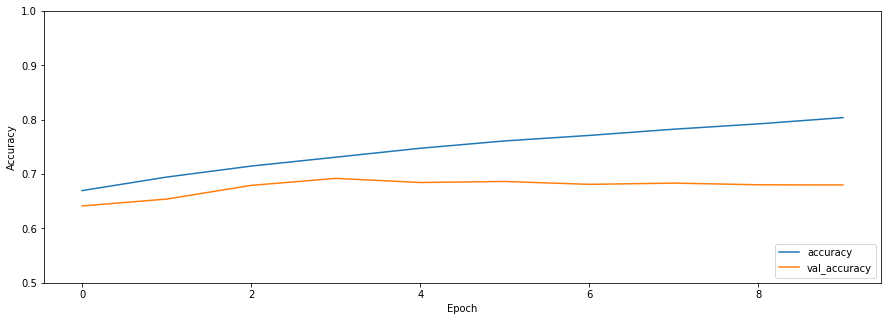

In [252]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#accuracy é a acurácia do treino
#val_accuracy é a acurácia do teste

In [254]:
print(test_acc)

0.6800000071525574


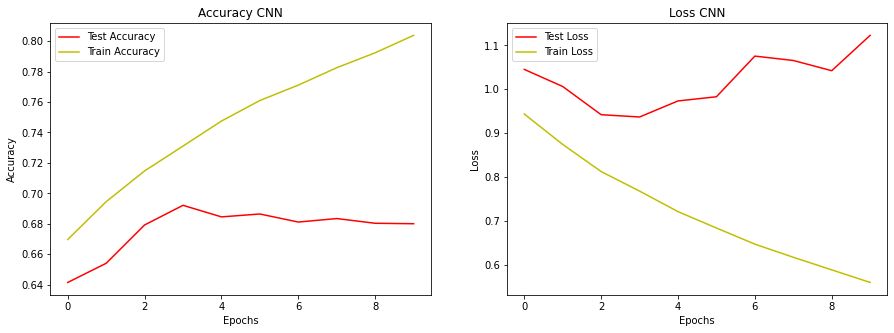

In [253]:
plt.rcParams["figure.figsize"] = (15,5)
epochs = len(history.history['loss'])
fig, a = plt.subplots(1, 2, squeeze= False)

a[0][0].plot(range(0,epochs), history.history['val_accuracy'], 'r', label = 'Test Accuracy')
a[0][0].plot(range(0,epochs), history.history['accuracy'], 'y', label = 'Train Accuracy')
a[0][0].set_title('Accuracy CNN')
a[0][0].set_xlabel('Epochs')
a[0][0].set_ylabel('Accuracy')
a[0][0].legend()

a[0][1].plot(range(0,epochs), history.history['val_loss'], 'r', label = 'Test Loss')
a[0][1].plot(range(0,epochs), history.history['loss'], 'y', label = 'Train Loss')
a[0][1].set_title('Loss CNN')
a[0][1].set_xlabel('Epochs')
a[0][1].set_ylabel('Loss')
a[0][1].legend()
     

#Visualization

## filters

In [ ]:
teste = filters.shape
print(filters)
type(filters)

#conv layer output (batch_size,height,width,depth) -> conv layer return a feature map

In [ ]:
#We will be visualising n_filters out of 32 filters from 1st layer.

# retrieve weights from the second hidden layer
filters , bias = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


_, _, n_channels, n_filters = filters.shape
n_channels = 3
n_filters = 5
ix=1
fig = plt.figure(figsize=(20,15))

#filter is a matrix, each value are pixels of the filter 
print(filters.shape)
for i in range(n_filters):
  f = filters[:, :, :, i]
  for j in range(n_channels):
    ax = plt.subplot(n_filters, n_channels, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :, j], cmap= 'viridis')
    ix += 1

plt.show()


## features maps

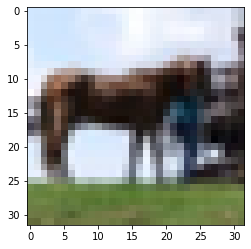

In [ ]:
for i in range(len(model.layers)):
    layer = model.layers[i]   
    print(i , layer.name, layer.output.shape)

In [ ]:
np.random.seed(6) #For Reproducibility
img_index = np.random.choice(range(0, len(test_images)))
img = test_images[img_index]
#plt.imshow(img)


img = np.expand_dims(img, axis=0) #Make it compatible with input shape


indexes = [0,2,4] #List of layers for which you want to visualise feature maps
outputs = [model.layers[i].output for i in indexes] #output of each layer in indexes

print(outputs)
model_feature_maps = Model(inputs=model.inputs, outputs=outputs) #Make a model to directly output feature maps

feature_maps = model_feature_maps.predict(img) #feature_maps layer


 
fig = plt.figure(figsize=(10,10))


square = 5
#Empty space to differentiate layers
s = f"""\n  \n"""


for fmap in feature_maps:
  ix = 1
  for _ in range(square):
    for _ in range(square):
      # specify subplot
      ax = plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])

      # plot filter channel 
      plt.imshow(fmap[0, :, :, ix-1], cmap='viridis')
      ix += 1

  
  plt.show()
